# ========================
# MOVIE INDUSTRY ANALYSIS
# ========================

### 1. Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

## 2. Loading the Dataset

In [98]:
# Now we need to read in the data
df = pd.read_csv(r'Movie_Industry/movies.csv')

In [100]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## 3. Missing Data Analysis

In [7]:
print("Missing Data by Column (%):")
for col in df.columns:
    missing_percent = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percent, 2)))

Missing Data by Column (%):
name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.28%
gross - 0.02%
company - 0.0%
runtime - 0.0%


#### Heatmap visualization

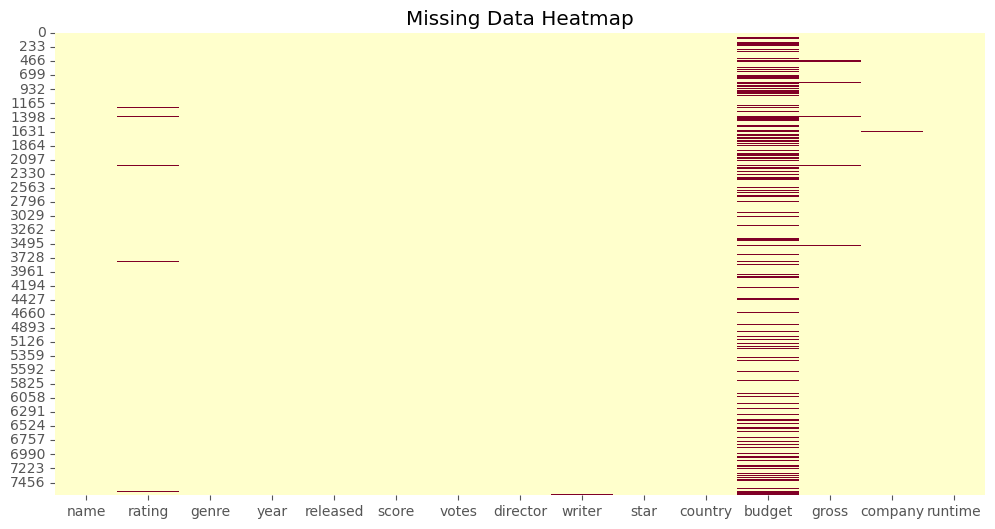

In [110]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Data Heatmap")
plt.show()

#### List columns with missing data only

In [112]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Columns with missing data > 0%:")
print(missing_percent[missing_percent > 0])

Columns with missing data > 0%:
budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
writer       0.039124
country      0.039124
released     0.026082
star         0.013041
dtype: float64


#### Checking data types

In [114]:
print("\nColumn Data Types:")
print(df.dtypes)


Column Data Types:
name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


## 4. Data Cleaning

#### Dropping rows where critical financial info is missing

In [116]:
df.dropna(subset=['budget', 'gross'], inplace=True)

#### Converting 'budget' and 'gross' to int64

In [119]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

#### Optional: Drop duplicates based on movie name and release year

In [15]:
df.drop_duplicates(subset=['name', 'year'], keep='first', inplace=True)

#### Optional: get a sorted list of unique companies (for display/EDA purposes)

In [ ]:
unique_companies = df['company'].drop_duplicates().sort_values(ascending=False)

## 5. Budget vs Gross Visualization

#### Basic scatter plot

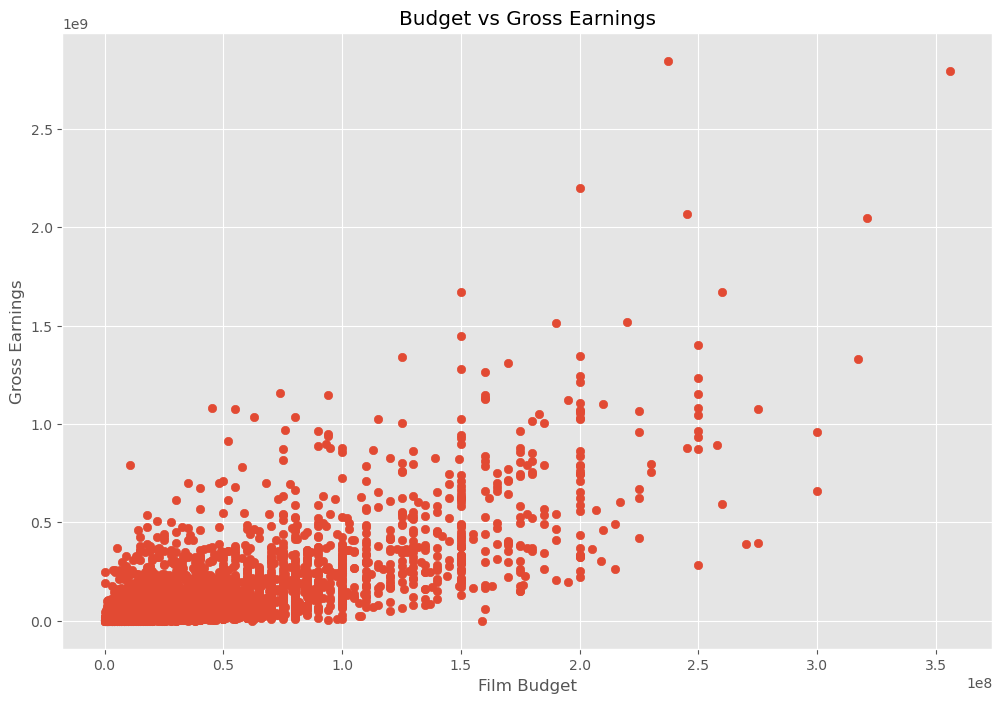

In [121]:
plt.figure(figsize=(12, 8))
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show()

#### Regression plot with Seaborn

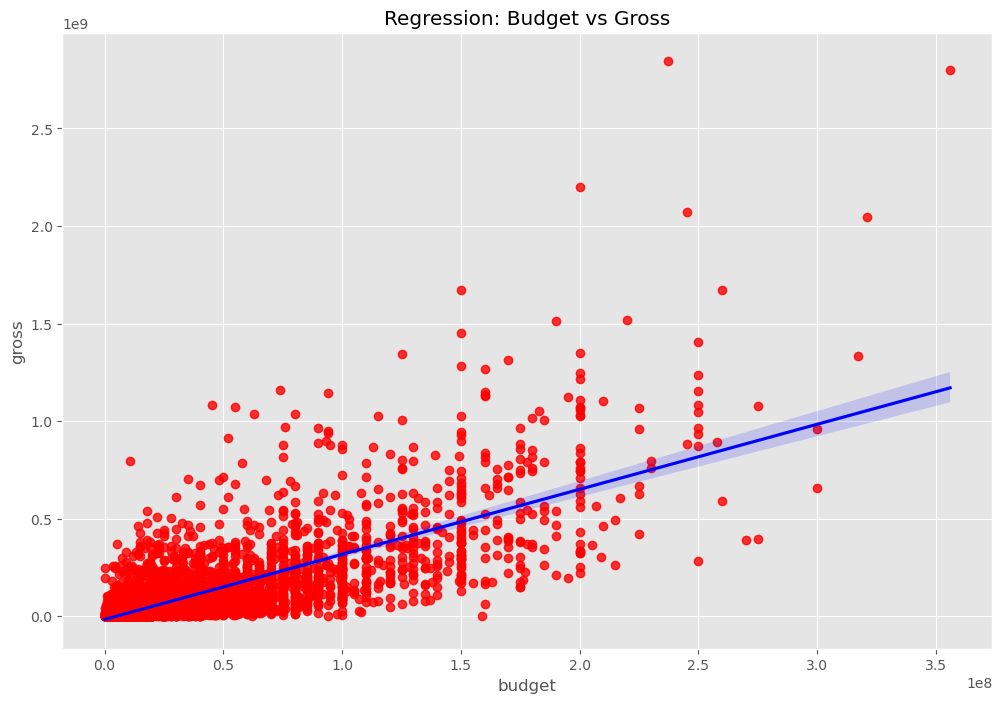

In [123]:
plt.figure(figsize=(12, 8))
sns.regplot(x='budget', y='gross', data=df,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Regression: Budget vs Gross')
plt.show()

## 6. Correlation Analysis - Numeric Features Only

#### Calculating correlation matrix for numeric features
    Pearson: linear relationship (default)
    Kendall: ordinal and monotonic relationship
    Spearman: ranked/monotonic relationship (less sensitive to outliers)

In [131]:
numeric_corr = df[['budget','gross','year','runtime','score']].corr(method='pearson')
numeric_corr

,budget,gross,year,runtime,score
budget,1.000000,0.740395,0.327781,0.318595,0.071792
gross,0.740395,1.000000,0.274264,0.275596,0.222143
year,0.327781,0.274264,1.000000,0.074203,0.055174
runtime,0.318595,0.275596,0.074203,1.000000,0.414580
score,0.071792,0.222143,0.055174,0.414580,1.000000


#### Heatmap of numeric features

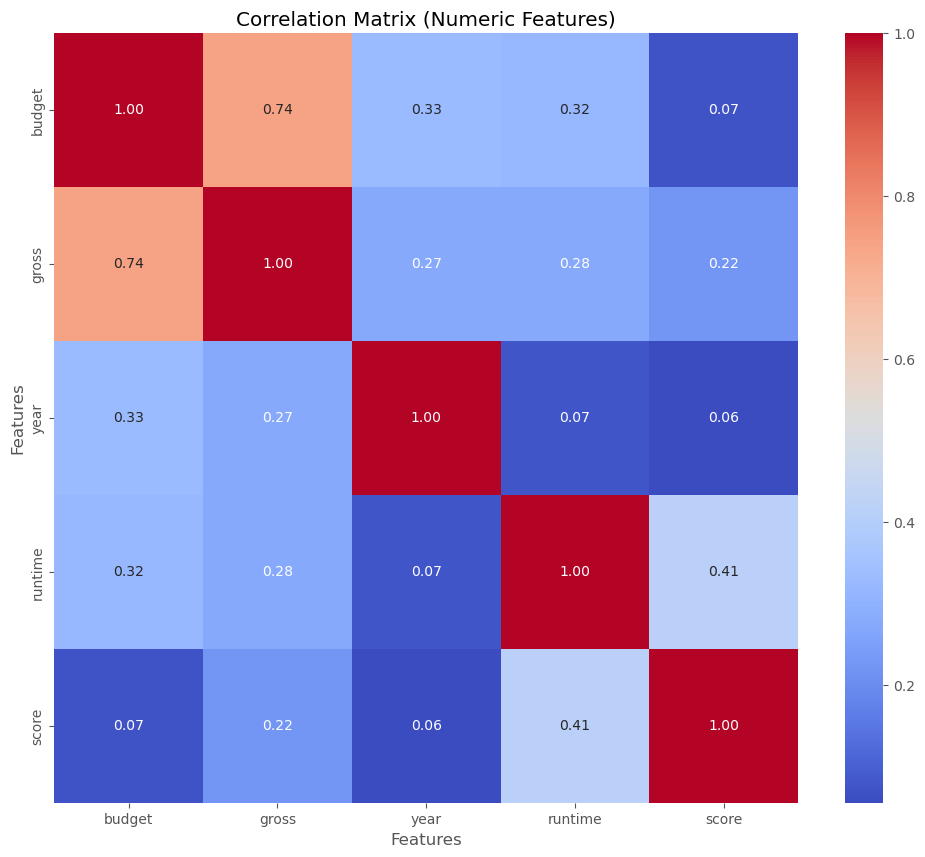

In [133]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

## 7. Transforming Categorical Data

In [135]:
df_numerized = df.copy()
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category').cat.codes

In [137]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0


## 8. Full Correlation Matrix

In [139]:
full_corr = df_numerized.corr(method='pearson')
full_corr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


#### Heatmap of all features

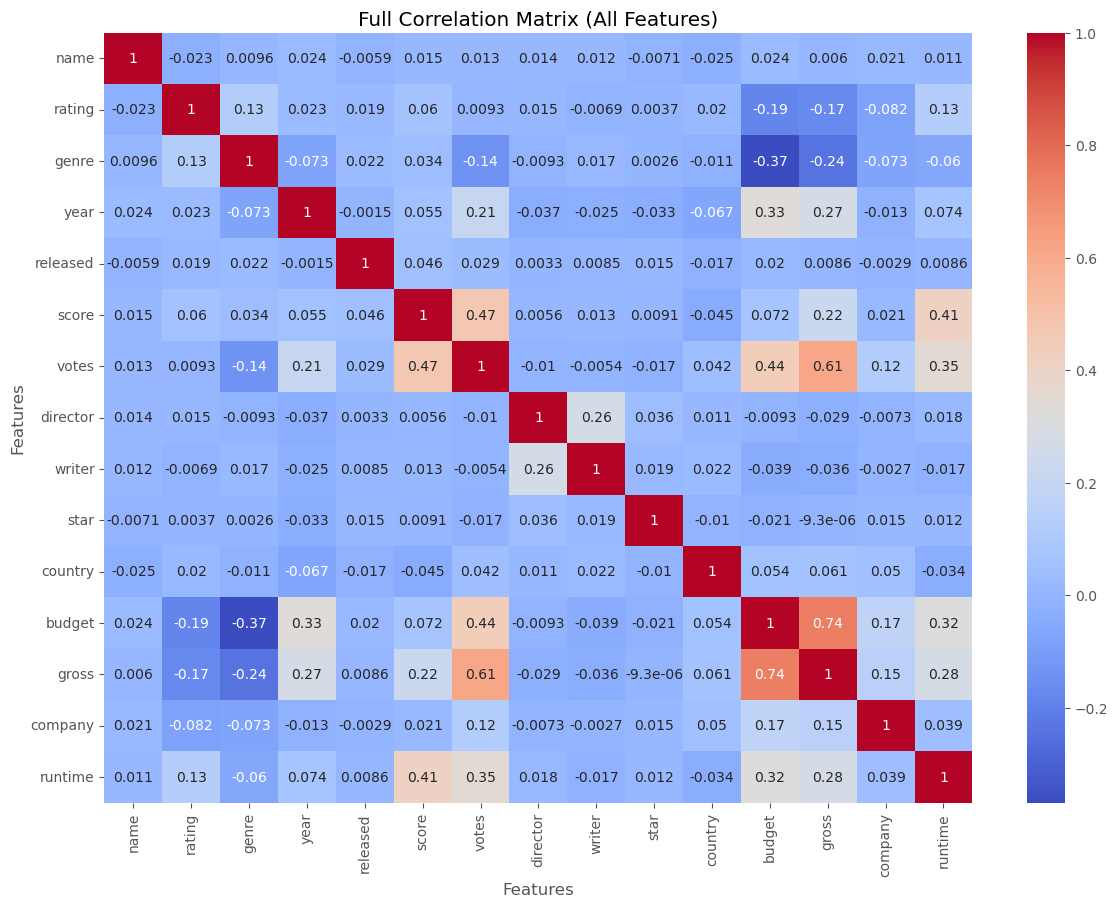

In [106]:
plt.figure(figsize=(14, 10))
sns.heatmap(full_corr, annot=True, cmap='coolwarm')
plt.title("Full Correlation Matrix (All Features)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

## 9. Finding Strong Correlations

In [145]:
corr_pairs = full_corr.unstack()
corr_pairs

name     name        1.000000
         rating     -0.023013
         genre       0.009617
         year        0.024435
         released   -0.005896
                       ...   
runtime  country    -0.033554
         budget      0.318595
         gross       0.275596
         company     0.038752
         runtime     1.000000
Length: 225, dtype: float64

In [82]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

genre    budget    -0.368900
budget   genre     -0.368900
genre    gross     -0.244380
gross    genre     -0.244380
rating   budget    -0.186892
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

#### Show only strong correlations (above 0.5 and without auto-correlations)

In [90]:
filtered_pairs = corr_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) < 1)]

# Sort pairs by correlation strength
strong_pairs = filtered_pairs.sort_values(kind="quicksort", ascending=False)

# Display strong pairs
print("Strongly correlated feature pairs (|corr| > 0.5):\n")
print(strong_pairs)

Strongly correlated feature pairs (|corr| > 0.5):

budget  gross     0.740395
gross   budget    0.740395
votes   gross     0.614904
gross   votes     0.614904
dtype: float64
